# Finding Advertising Markets

In this project, we are working for an e-learning company that offers courses on programming.  We are looking for the best two markets in which to advertise our product.  To do this, we will use different summary statistics.

The data we will use will come from freeCodeCamp's 2017 survey of developers.  This dataset is available on __[GitHub here](https://github.com/freeCodeCamp/2017-new-coder-survey)__.

In [1]:
# imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
survey_data = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory=0)
print(survey_data.shape)

(18175, 136)


In [3]:
# review inital rows of data
survey_data.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# review columns to determine appropriate ones for our analysis
list(survey_data)

['Age',
 'AttendedBootcamp',
 'BootcampFinish',
 'BootcampLoanYesNo',
 'BootcampName',
 'BootcampRecommend',
 'ChildrenNumber',
 'CityPopulation',
 'CodeEventConferences',
 'CodeEventDjangoGirls',
 'CodeEventFCC',
 'CodeEventGameJam',
 'CodeEventGirlDev',
 'CodeEventHackathons',
 'CodeEventMeetup',
 'CodeEventNodeSchool',
 'CodeEventNone',
 'CodeEventOther',
 'CodeEventRailsBridge',
 'CodeEventRailsGirls',
 'CodeEventStartUpWknd',
 'CodeEventWkdBootcamps',
 'CodeEventWomenCode',
 'CodeEventWorkshops',
 'CommuteTime',
 'CountryCitizen',
 'CountryLive',
 'EmploymentField',
 'EmploymentFieldOther',
 'EmploymentStatus',
 'EmploymentStatusOther',
 'ExpectedEarning',
 'FinanciallySupporting',
 'FirstDevJob',
 'Gender',
 'GenderOther',
 'HasChildren',
 'HasDebt',
 'HasFinancialDependents',
 'HasHighSpdInternet',
 'HasHomeMortgage',
 'HasServedInMilitary',
 'HasStudentDebt',
 'HomeMortgageOwe',
 'HoursLearning',
 'ID.x',
 'ID.y',
 'Income',
 'IsEthnicMinority',
 'IsReceiveDisabilitiesBenefits'

## Data Summary

In attempting to determine in what markets to advertise for this e-learning company, we can use this survey data rather than collecting our own data (this is a cheaper and faster alternative).

Our company has classes on web and mobile development as well as data science and game development.  In determining where to advertise, we would like to use this data to see which coders are interested in the topics the company covers (the `JobInterest...` fields), how much coders are willing to spend to learn (`MoneyForLearning`), and where geographically these coders are located (`CountryLive`).

## Is This Survey Data Appropriate?

The first question we will address is whether this survey data is appropriate for our use.  Is this data representative for our population of interest (coders who may want to use our company's e-learning courses)?  Are these coders interested in the subjects our company teaches (primarily web and mobile development, but also other subjects)?

In [5]:
# look at JobRoleInterest
survey_data['JobRoleInterest'].value_counts(normalize=True) * 100

Full-Stack Web Developer                                                                                                                                                                                               11.770595
  Front-End Web Developer                                                                                                                                                                                               6.435927
  Data Scientist                                                                                                                                                                                                        2.173913
Back-End Web Developer                                                                                                                                                                                                  2.030892
  Mobile Developer                                                                                  

Web and mobile development rank high in the interests, which is good for the usefulness of this data for our purposes, but there are many responses with multiple interests.  To better analyze what roles the survey respondents are interested in, let's look a little closer at this field.

In [6]:
# determine how many roles each respondent was interested in
job_interests = ['JobInterestBackEnd', 'JobInterestDataEngr', 
                 'JobInterestDataSci', 'JobInterestDevOps', 
                 'JobInterestFrontEnd', 'JobInterestFullStack',
                 'JobInterestGameDev', 'JobInterestInfoSec', 
                 'JobInterestMobile', 'JobInterestOther', 
                 'JobInterestProjMngr', 'JobInterestQAEngr', 
                 'JobInterestUX']
survey_data['number_role_interests'] = survey_data[job_interests].sum(axis=1)
survey_data['number_role_interests'].head()

0    0.0
1    1.0
2    5.0
3    3.0
4    5.0
Name: number_role_interests, dtype: float64

In [7]:
# examine these counts across the dataset
survey_data['number_role_interests'].value_counts(normalize=True) * 100

0.0     56.060523
1.0     13.793673
3.0      6.987620
4.0      6.806052
5.0      5.155433
2.0      4.847318
6.0      2.905089
7.0      1.738652
8.0      0.775791
9.0      0.445667
10.0     0.225585
12.0     0.170564
11.0     0.088033
Name: number_role_interests, dtype: float64

From the above, most of the respondents didn't provide a job interest.  Of those who did, only a small portion had only one interest - many more had multiple interests.

Next, it would be good to know of those who expressed an interest, what proportion are interested in web or mobile development, our company's primary focus.

In [8]:
# isolate those who have expressed some interest(s)
has_interests = survey_data[pd.notnull(survey_data['JobRoleInterest'])].copy()
# replace nan with 0
has_interests.fillna(value=0, inplace=True)

In [9]:
# determine how many are interested in web or mobile development
has_interests['web_or_mobile'] = (has_interests['JobInterestFullStack'] + 
                                  has_interests['JobInterestFrontEnd'] + 
                                  has_interests['JobInterestBackEnd'] + 
                                  has_interests['JobInterestMobile'])
has_interests['web_or_mobile'] = has_interests['web_or_mobile'].apply(
    lambda x: min(x,1))
has_interests['web_or_mobile'].value_counts(normalize=True) * 100

1.0    86.084096
0.0    13.915904
Name: web_or_mobile, dtype: float64

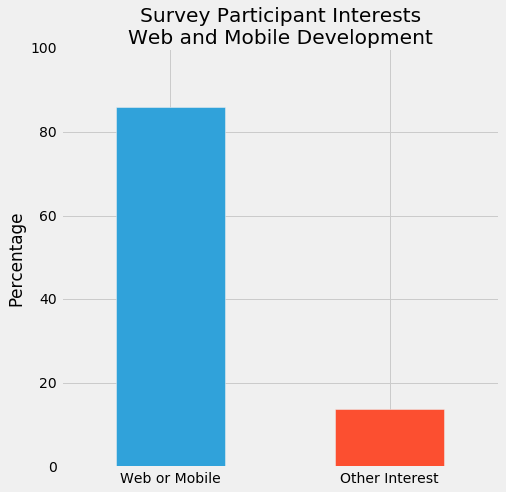

In [10]:
# create graph of web_or_mobile
plt.style.use('fivethirtyeight')
int_freq = has_interests['web_or_mobile'].value_counts(normalize=True) * 100
int_freq.plot.bar(figsize=(7,7))
plt.title('Survey Participant Interests\nWeb and Mobile Development')
plt.ylabel('Percentage')
plt.xticks([0,1],['Web or Mobile', 'Other Interest'], rotation=0)
plt.ylim((0,100))
plt.show()

From the above analysis, it appears that most of the survey participants who expressed an interest are interested in the areas of programming in which our company offers e-learning courses.  We will want to advertise to people interested in different areas of programming, but especially web and mobile development.  This dataset looks like it will work for our purposes.

## Location

The next piece to analyze in our data is where these people are located.  We can look at the `CountryLive` variable, which identifies in which country the participant currently lives.  This may help us to determine in which countries (i.e. markets) we may want to advertise.

In [11]:
# look at the distribution of countries participants live in
# let's use the dataset where participants expressed at least one interest
has_interests = survey_data[pd.notnull(survey_data['JobRoleInterest'])].copy()
has_interests['CountryLive'].value_counts().head(10)

United States of America    3125
India                        528
United Kingdom               315
Canada                       260
Poland                       131
Brazil                       129
Germany                      125
Australia                    112
Russia                       102
Ukraine                       89
Name: CountryLive, dtype: int64

In [12]:
# also look at this normalized
has_interests['CountryLive'].value_counts(normalize=True).head(10)

United States of America    0.457005
India                       0.077216
United Kingdom              0.046066
Canada                      0.038023
Poland                      0.019158
Brazil                      0.018865
Germany                     0.018280
Australia                   0.016379
Russia                      0.014917
Ukraine                     0.013016
Name: CountryLive, dtype: float64

From the above, the USA has both the largest absolute number (3125) and largest relative number (0.457005) of people who expressed an interest.  This is definitely a promising market to investigate.

For our second market, the next countries to look at are India, the United Kingdom, and Canada.  While these are all much smaller relative to the USA, these three form the next largest group.

It would be interesting to see in these countries whether there are people willing to pay for the e-learning services our company can provide.

## Spending Money on Learning

How much are these participants willing to spend on learning?  Ultimately, for our company to be successful, not only will we need interested coders, but also these coders will need to be willing to purchase our programming courses.

Our company sells subscriptions at the price of $59 per month.  We would like to compare this to what our survey participants are willing to spend each month.  However, the data we have in `MoneyForLearning` is the amount of money the participant spent on learning in total from the time they began coding.  We will want to transform this into a monthly amount to compare to what our company charges.

Let's investigate the top four countries we found above - the USA, India, the United Kingdom, and Canada.  These have the highest frequencies of participants interested in web and mobile development, and English is an official language in all of these countries (which is important, as our e-learning courses are written in English).

In [13]:
# to get our per-month, we need to divide by MonthsProgramming
# let's set all of those with 0s to 1s so we can divide in the next step
has_interests['MonthsProgramming'].replace(0, 1, inplace=True)

In [14]:
# estimate amount of money spent on learning per month
has_interests['money_per_month'] = has_interests['MoneyForLearning'] / has_interests['MonthsProgramming']
# how many missing values?
has_interests['money_per_month'].isnull().sum()

675

In [15]:
# keep rows without missing values in money_per_month
int_money = has_interests[has_interests['money_per_month'].notnull()]

In [16]:
# keep rows without missing values in CountryLive
int_money = int_money[int_money['CountryLive'].notnull()]

In [17]:
# review counts by country after dropping some rows
int_money['CountryLive'].value_counts().head(10)

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Poland                       122
Germany                      114
Brazil                       111
Australia                    102
Russia                        79
Ukraine                       79
Name: CountryLive, dtype: int64

We have removed several rows with data, but we still have a significant amount of data to proceed.  We would like to group our data by country for our four countries of interest and determine how much money is spent per month on average in each of these countries.

In [18]:
# review mean by country
countries = ['United States of America','India','United Kingdom','Canada']
countries_mean = int_money.groupby('CountryLive').mean()
countries_mean['money_per_month'][countries]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: money_per_month, dtype: float64

It is unexpected that the means for the United Kingdom and Canada `money_per_month` are lower than that of India.  Given that the standard of living is higher in the United Kingdom and Canada, I would have expected more disposable income to be spent on e-learning in these countries than in India.  Maybe this is indicative of a data issue, or maybe the data is correct and something else explains why this doesn't follow the expected pattern.

## Look for Outliers

Let's next look at boxplots for each of the four countries of interest.  Are there any outliers in our data?  Do we need to remove any outliers and then recompute the previous calculations?

In [19]:
# select data for only the four countries of interest
int_money_four = int_money[int_money['CountryLive'].isin(countries)]

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


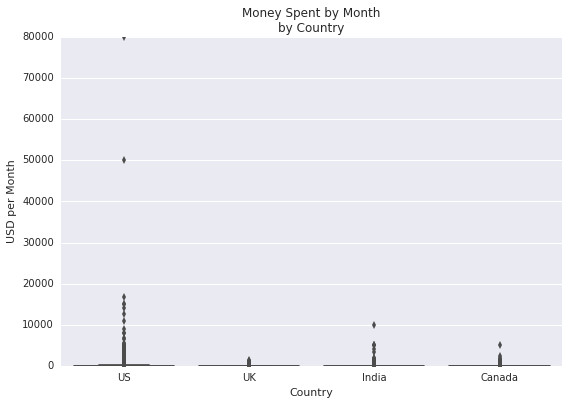

In [20]:
# create boxplots for each of the four countries

import seaborn as sns
sns.boxplot(x='CountryLive', y='money_per_month', data=int_money_four)
plt.title('Money Spent by Month\nby Country')
plt.ylabel('USD per Month')
plt.xlabel('Country')
plt.xticks([0,1,2,3],['US', 'UK', 'India', 'Canada'], rotation=0)
plt.show()

There seem to be some extreme outliers in the data based on the above plot.  In the US, there are values of \$50,000 and \$80,000 per month.  In India, there seems to be one over \$10,000.  Let's only look at monthly spending less than \$10,000 and recompute.

In [21]:
# only keep rows where monthly spending < $10,000
int_money_four = int_money_four[int_money_four['money_per_month'] < 10000]

In [22]:
# recompute the means from above
countries_mean_rev = int_money_four.groupby('CountryLive').mean()
countries_mean_rev['money_per_month'][countries]

CountryLive
United States of America    155.459187
India                       113.748387
United Kingdom               45.534443
Canada                      113.510961
Name: money_per_month, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


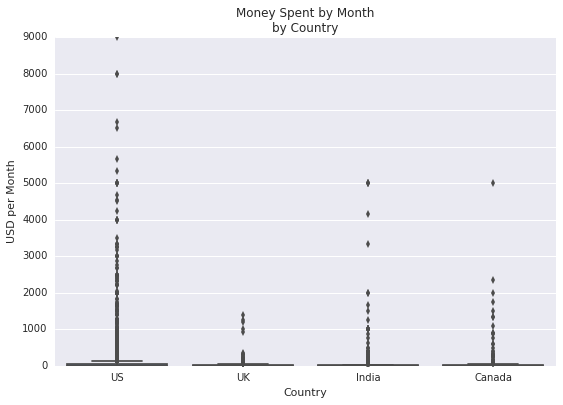

In [23]:
# redo the boxplot
sns.boxplot(x='CountryLive', y='money_per_month', data=int_money_four)
plt.title('Money Spent by Month\nby Country')
plt.ylabel('USD per Month')
plt.xlabel('Country')
plt.xticks([0,1,2,3],['US', 'UK', 'India', 'Canada'], rotation=0)
plt.show()

There still appear to be a few possible outliers.  Maybe some of these people attended bootcamps.  If so, the data may be correct, as these bootcamps can be very expensive.  

In addition, for a new programmer who starts with a bootcamp, a large amount is paid up front and then likely little is paid in the next few months.  If we see very high numbers with a bootcamp but only a few months of programming, the monthly amount the person is willing to spend ongoing is probably overstated (the person is not going to pay for another bootcamp every couple months).

If we can't find anything in the data to support these very high monthly costs, then we will remove the outliers.

In [24]:
# review Canada outliers
canada_outliers = int_money_four[
    (int_money_four['CountryLive'] == 'Canada') &
    (int_money_four['money_per_month'] > 3000)
    ]
canada_outliers[['AttendedBootcamp', 'MonthsProgramming', 'money_per_month']]

,AttendedBootcamp,MonthsProgramming,money_per_month
13659,1.0,2.0,5000.0


Let's remove this one person as an extreme outlier.  This person has only been programming for two months, and has spent a large amount of money on a bootcamp.  The ongoing average monthly spending will likely be much lower.

In [25]:
# remove the outliers for Canada
int_money_four = int_money_four.drop(canada_outliers.index)

In [26]:
# review India outliers
india_outliers = int_money_four[
    (int_money_four['CountryLive'] == 'India') &
    (int_money_four['money_per_month'] > 3000)
    ]
india_outliers[['AttendedBootcamp', 'MonthsProgramming', 'money_per_month']]

,AttendedBootcamp,MonthsProgramming,money_per_month
1728,0.0,4.0,5000.000000
1755,0.0,15.0,3333.333333
7989,0.0,1.0,5000.000000
8126,0.0,1.0,5000.000000
15587,0.0,24.0,4166.666667


None of the outliers for India attended a bootcamp.  Several of these are new programmers, so maybe they purchased a bootcamp but did not report it.  Or maybe these programmers are incorrectly including tuition in the spending reported.  We do not know why these appear to be so large, so we will exclude them as outliers.

In [27]:
# remove the outliers for India
int_money_four = int_money_four.drop(india_outliers.index)

In [28]:
# review US outliers
usa_outliers = int_money_four[
    (int_money_four['CountryLive'] == 'United States of America') &
    (int_money_four['money_per_month'] > 6000)
    ]
usa_outliers[['AttendedBootcamp', 'MonthsProgramming', 'money_per_month']]

,AttendedBootcamp,MonthsProgramming,money_per_month
718,1.0,1.0,8000.000000
1222,1.0,2.0,6500.000000
3184,1.0,1.0,9000.000000
7505,1.0,3.0,6666.666667
9778,1.0,1.0,8000.000000


Similar to what we saw with India, all of these people purchased bootcamps and are within a few months of just beginning programming.  I expect that this is a one-time large cost and ongoing monthly spending will be lower, so I will remove these outliers from the data as well.

In [29]:
# remove the outliers for USA
int_money_four = int_money_four.drop(usa_outliers.index)

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


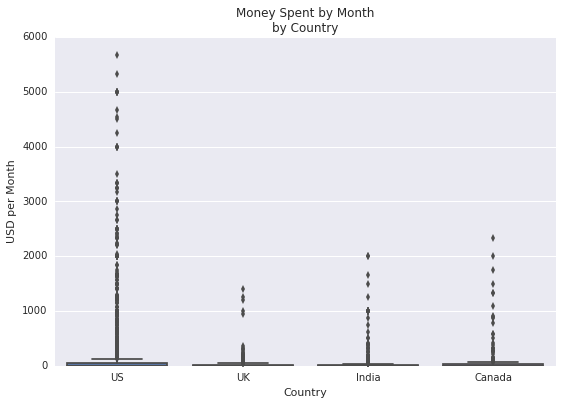

In [30]:
# redo the boxplot
sns.boxplot(x='CountryLive', y='money_per_month', data=int_money_four)
plt.title('Money Spent by Month\nby Country')
plt.ylabel('USD per Month')
plt.xlabel('Country')
plt.xticks([0,1,2,3],['US', 'UK', 'India', 'Canada'], rotation=0)
plt.show()

In [31]:
# recompute the means from above
countries_mean_rev2 = int_money_four.groupby('CountryLive').mean()
countries_mean_rev2['money_per_month'][countries]

CountryLive
United States of America    142.654608
India                        65.758763
United Kingdom               45.534443
Canada                       93.065400
Name: money_per_month, dtype: float64

## Choosing the Two Markets

From the above analysis, it now seems that the USA is clearly one market in which our company should advertise.

The second market choice is less clear.

- Canada appears to be willing to spend more per month on learning.
- India appears to have a larger potential pool of new programmers.

There are several possible ways to proceed:

1. Advertise in the USA only.  The other two countries are much smaller and have significantly less money to spend per month.  It may be worth it to not split the advertising across countries.

2. Advertise in the USA and Canada.  These countries have the most amount of money to spend per month.  However, Canada is a smaller market, so the majority of our spending should likely be in the USA.

3. Advertise in the USA and India.  These countries have the largest markets of possible new programmers.  However, India is a smaller market, so the majority of our spending should likely be in the USA.

4. Advertise in the USA, Canada, and India.  It may be better to advertise in all three countries, to take advantage of the higher monthly amount to spend in Canada and the larger market in India, if the company thinks that advertising in three different markets is workable.

In the end, the ultimate decision probably rests with the marketing department and management.  Other factors may come into play including how much it costs to advertise in these different countries, the company's future plans for expansion into other languages, etc.